In [1]:
import ROOT
from draw_funcs import draw_chi2_gaussian_sim, draw_1d_hist, draw_2d_hist2
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
entry = 6
nevents = 1000000
mfield = 1.3
input_path = '/var/kinfit/data/tr_ph_run021142.root'
output_path = 'kinfit_gaussian_fit_etapipi_etato2gamma_run021142_.root'

In [3]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

0

(int) 0


In [4]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

0

(int) 0


In [5]:
ROOT.gInterpreter.ProcessLine('.L TrPh.C++')

0

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/gauss_sim_etapipi_eta_to_2gamma/all_constraints/TrPh_C.so


In [6]:
ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

140114788859944

(TFile &) Name: /var/kinfit/data/tr_ph_run021142.root Title: 


In [7]:
ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

140113088630784

(TrPh &) @0x7f6e9ee05000


In [8]:
ROOT.gInterpreter.ProcessLine('a.setNEvents({})'.format(nevents))

0

In [9]:
ROOT.gInterpreter.ProcessLine('a.setEntry({})'.format(entry))

0

In [10]:
ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

0

In [11]:
ROOT.gInterpreter.ProcessLine('fl.Close()')

0

In [12]:
fl = TFile.Open(output_path, 'read')

In [13]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                        return 0.1875 * p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')

0

In [14]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 24, 2)')

140114788860816

(TF1 &) Name: f0 Title: f0


In [15]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 2.e+4)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 6)')

0

In [16]:
ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')

94121239303472

 FCN=134.437 FROM MIGRAD    STATUS=CONVERGED      53 CALLS          54 TOTAL
                     EDM=3.53627e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99880e+05   1.00051e+03   5.60242e+00   1.74414e-10
   2  p1           6.99739e+00   3.49555e-03   1.98636e-05   2.40520e-03
(TFitResultPtr) <nullptr TFitResult>


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


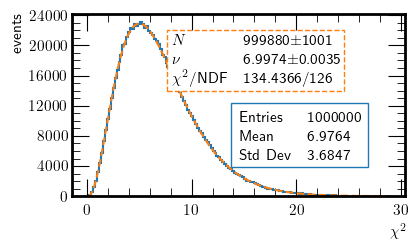

In [17]:
draw_chi2_gaussian_sim("kf_chi2", "f0", 
                       xlabel=r'$\chi^2$',
                       ylabel='events',
                       fraction=0.8,
                       info_coords=(0.5, 0.2),
                       dw=-0.2,
                      dh=0.4,
                      h_y=4000,
                      h_x=10)
plt.savefig('kf_chi2_gsim_etapipi.eps')

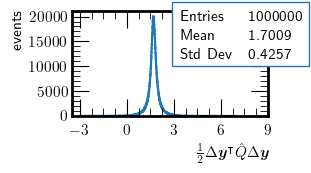

In [18]:
draw_1d_hist("qhist", 
             xlabel=r'$\frac{1}{2}\Delta\bm{y}^{\intercal}\hat{Q}\Delta\bm{y}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.55, 0.55),
            h_y=5000, h_x=3)
plt.gcf().subplots_adjust(bottom=0.275)
plt.savefig("qhalf_gsim_etapipi.eps", bbox_inches='tight')

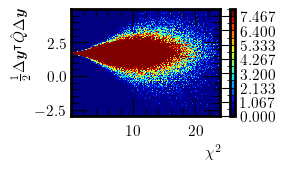

In [19]:
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(0, 8, 16)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
draw_2d_hist2('chi2_vs_q', 
              xlabel=r'$\chi^2$', 
              ylabel=r'$\frac{1}{2}\Delta\bm{y}^{\intercal}\hat{Q}\Delta\bm{y}$', 
              fraction=0.47,
              bins=(200, 200),
              norm=norm,
              clip=((0, 30.), (-3., 5.)))
plt.gcf().subplots_adjust(left=0.235)
plt.gcf().subplots_adjust(bottom=0.26)
plt.savefig('qhalf_vs_chi2_gsim_etapipi.eps')

In [20]:
# fl.Close()